## Previsões de vendas com Sklearn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# 1. Criar um dicionário com dados fictícios de vendas mensais
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]}

In [6]:
# 2. Transformar o dicionário em um DataFrame
df_vendas = pd.DataFrame(dados_vendas)

In [7]:
# 3. Adicionar uma coluna para representar os meses numericamente
df_vendas['mes_numero'] = range(1, 13)

In [16]:
# 4. Dividir os dados em conjuntos de treinamento e teste
X = df_vendas[['mes_numero']]
y = df_vendas['vendas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 5. Escolher e treinar um modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# 6. Fazer previsões e avaliar o modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 5765.308510970324
R² Score: 0.9804933170681456


In [12]:
# Exibir os coeficientes do modelo
print(f"Intercepto: {model.intercept_}")
print(f"Coeficiente: {model.coef_}")

Intercepto: 2019.5530726256984
Coeficiente: [109.3575419]


In [18]:
# Prever as vendas para o mês de Dezembro (mes_numero = 12)
previsao_dezembro = model.predict(pd.DataFrame([[12]], columns=["mes_numero"]))
print(f"Previsão de vendas para Dezembro: {round(previsao_dezembro[0], 2)}")

Previsão de vendas para Dezembro: 3331.84


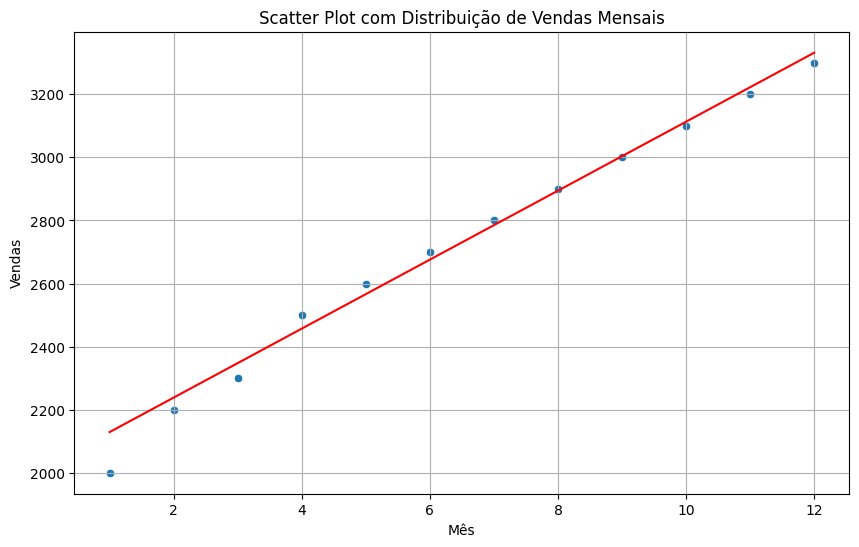

In [13]:
# Plot de Scatter com distribuição
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mes_numero', y='vendas', data=df_vendas)
plt.plot(df_vendas['mes_numero'], model.predict(df_vendas[['mes_numero']]), color='red')
plt.title('Scatter Plot com Distribuição de Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()

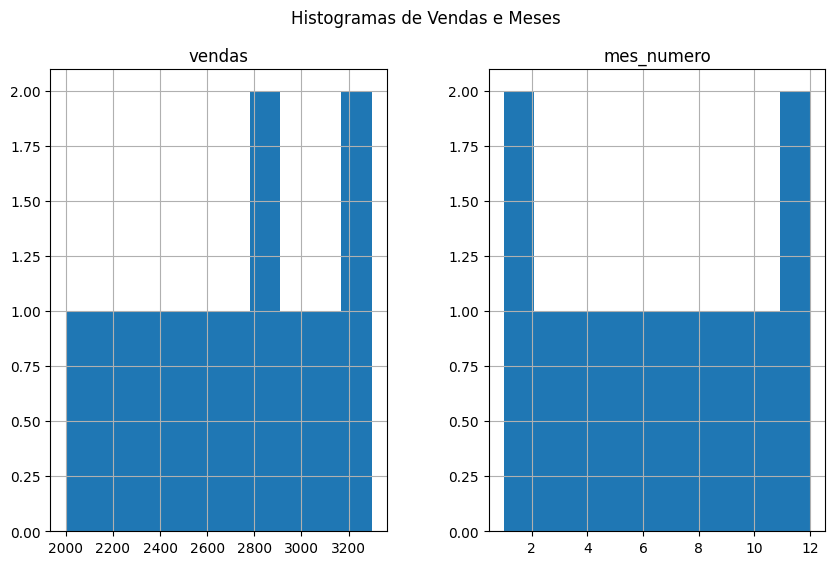

In [15]:
# Histograma de todas as variáveis
df_vendas.hist(bins=10, figsize=(10, 6), grid=True)
plt.suptitle('Histogramas de Vendas e Meses')
plt.show()